In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
df_haiti = pd.read_csv('cholera_cleaned.csv')
#df_haiti.set_index('Month', inplace=True)
#dataset from https://data.humdata.org/dataset/haiti-number-of-cholera-cases-per-month-since-2010 

In [21]:
df_haiti

,Month,Monthly deaths,Monthly cases
0,31-Oct-10,557,20905
1,30-Nov-10,1590,69688
2,31-Dec-10,1954,94617
3,31-Jan-11,573,54710
4,28-Feb-11,186,28372
5,31-Mar-11,138,24993
6,30-Apr-11,161,18835
7,31-May-11,193,29785
8,30-Jun-11,546,56352
9,31-Jul-11,361,39207


In [25]:
df_haiti.dtypes

Month             object
Monthly deaths     int64
Monthly cases      int64
dtype: object

In [ ]:
df_haiti.plot(figsize=(20,10))

In [ ]:
#goal - get it to month-over-month datetime 

In [28]:
# http://strftime.org/ 
df_haiti['Date'] = pd.to_datetime(df_haiti['Month'].astype(str),format='%d-%b-%y') 

In [29]:
df_haiti.dtypes

Month                     object
Monthly deaths             int64
Monthly cases              int64
Date              datetime64[ns]
dtype: object

In [31]:
del df_haiti['Month']

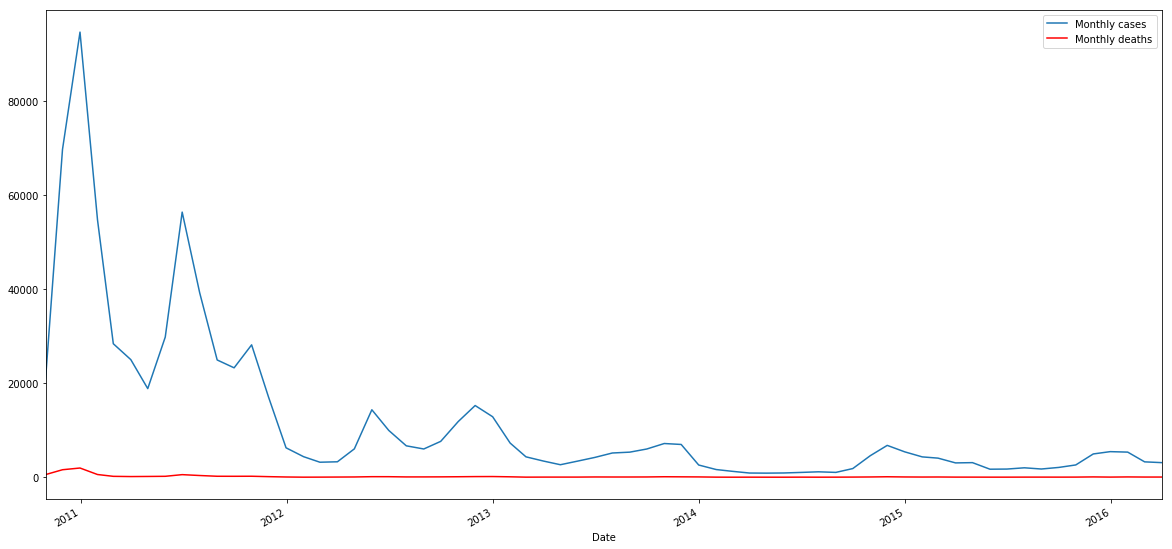

In [44]:
ax = df_haiti.plot(x='Date',y='Monthly cases',figsize=(20,10))
df_haiti.plot(ax=ax,x='Date',y='Monthly deaths',figsize=(20,10),color='red')

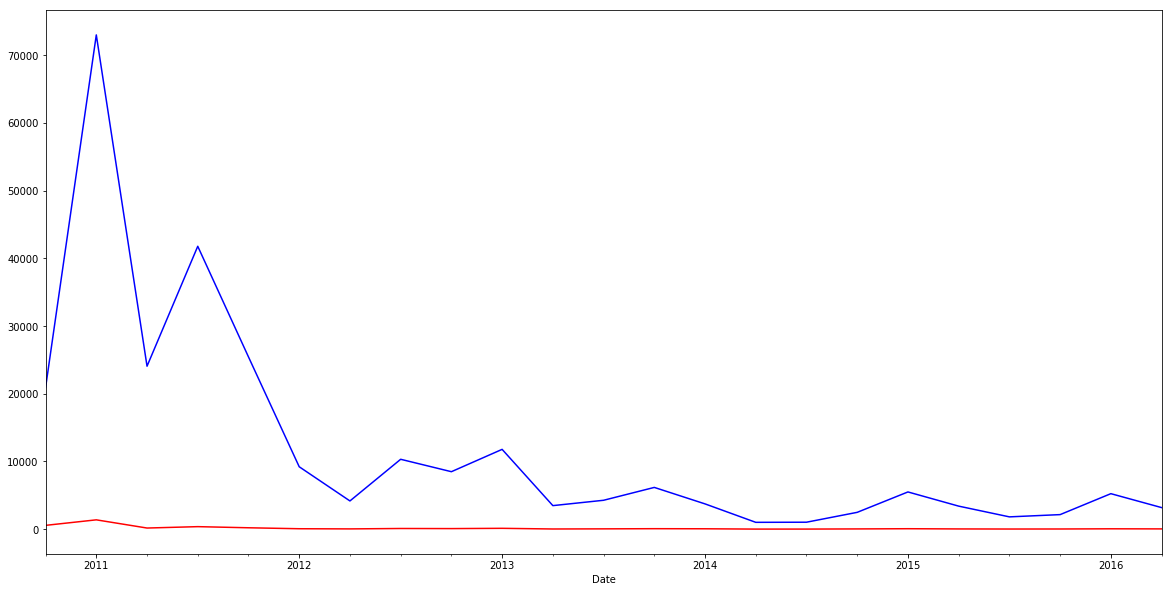

In [48]:
ax = df_haiti.resample('3M', on='Date')['Monthly cases'].mean().plot(figsize=(20,10), color="blue")
df_haiti.resample('3M', on='Date')['Monthly deaths'].mean().plot(ax=ax,figsize=(20,10), color="red")
#df_haiti.ylim([0,70000])

In [ ]:
from bs4 import BeautifulSoup
import requests

In [ ]:
response = requests.get('https://query.nytimes.com/search/sitesearch/?action=click&contentCollection&region=TopBar&WT.nav=searchWidget&module=SearchSubmit&pgtype=Homepage#/Haiti+cholera/from20090101to20161231/allresults/1/allauthors/oldest/')
doc = BeautifulSoup(response.text, 'html.parser')

In [ ]:
links = doc.find_all('a')

for link in links[:10]:
    print("This is a link")
    print(link.text)

In [ ]:
story = doc.find_all('div', { 'id': 'page' })
story
#for story in story[:10]:
#    print("This is a story")
#    print(story.text)